**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/alavikunhu/Dataset/main/carclaims.csv')

In [ ]:
#df.head()
df.info()
#df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

**Conclusion first look**



*   15420 rows with 33 columns
*   8 numerical fetures and 25 categorical features
*   No missing values
*   No duplication data point
*   Fraud data points are 5.99 % of all data point, so we deal with "Imbalance class problem".


In [ ]:
#check missing Values
df.isnull().sum().sum()

0

In [ ]:
#check duplications
df.duplicated().sum()

0

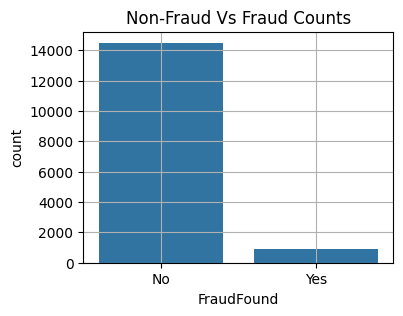

In [ ]:
#check Volume of each classes
plt.figure(figsize=(4,3))
sns.countplot(x=df['FraudFound'])
plt.title("Non-Fraud Vs Fraud Counts")
plt.grid()
plt.show()

In [ ]:
number_fraud = len(df[df['FraudFound']=='Yes'])
print(number_fraud)
#Check Minority class
percent = (number_fraud / df.shape[0]) * 100
print(f"fraud detected are {percent:.2f} % of all data points")

923
fraud detected are 5.99 % of all data points


In [ ]:
#check rows and Columns
print(f"This dataframe contain {df.shape[0]} rows")
print(f"This dataframe contain {df.shape[1]} columns")

This dataframe contain 15420 rows
This dataframe contain 33 columns


<ipython-input-323-5032a3fbd3d7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


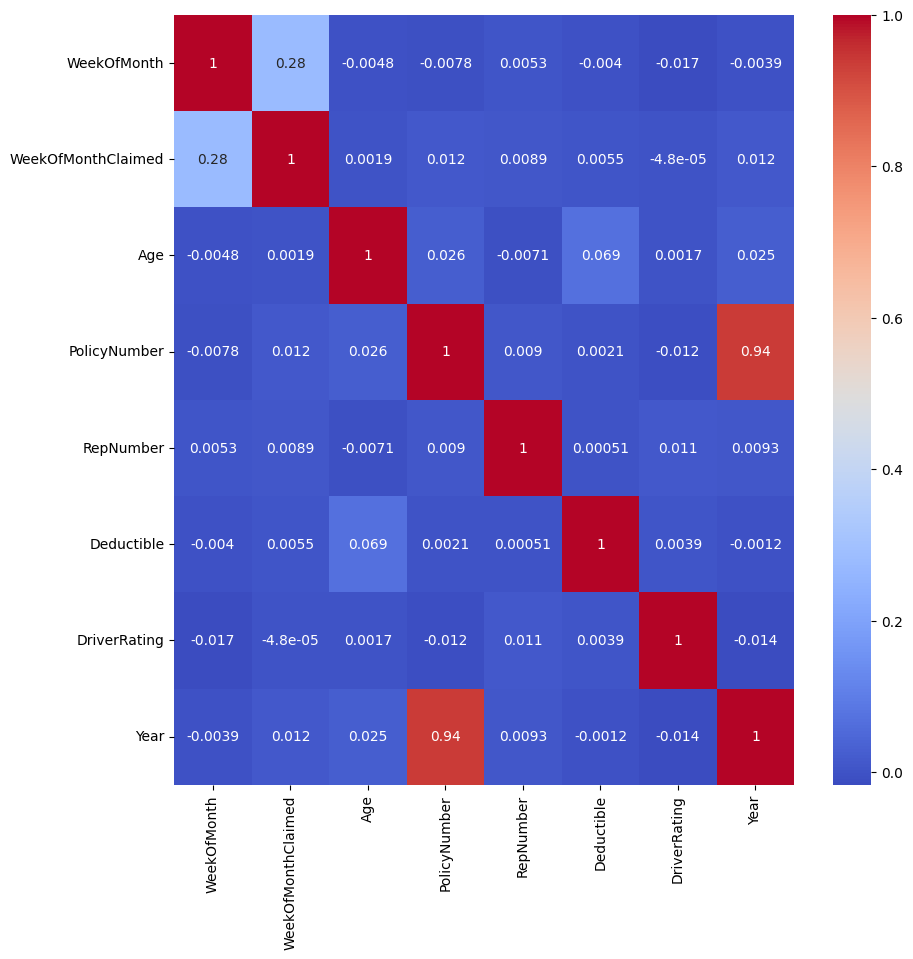

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

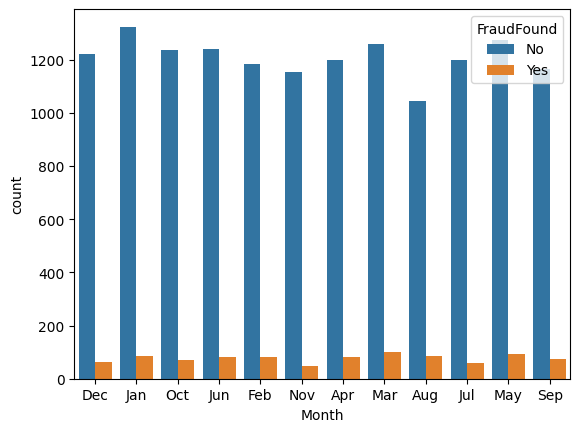

In [ ]:
sns.countplot(data=df, x='Month', hue='FraudFound')
plt.show()

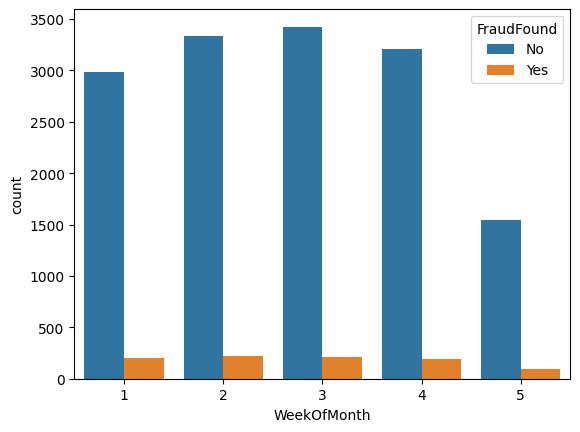

In [ ]:
sns.countplot(data=df, x='WeekOfMonth', hue='FraudFound')
plt.show()

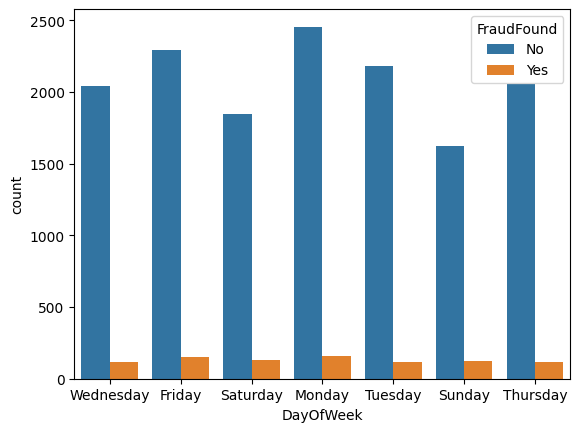

In [ ]:
sns.countplot(data=df, x='DayOfWeek', hue='FraudFound')
plt.show()

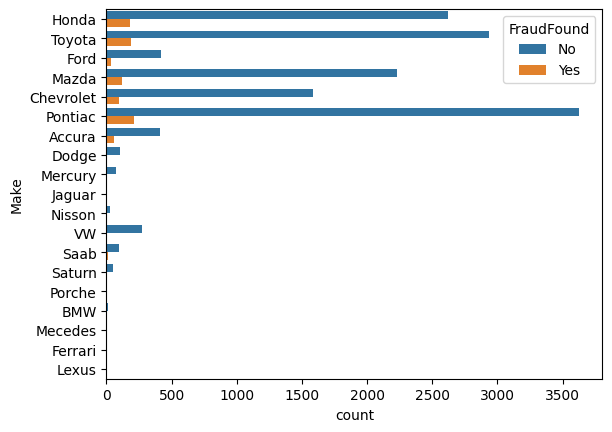

In [ ]:
sns.countplot(data=df, y='Make', hue='FraudFound')
plt.show()

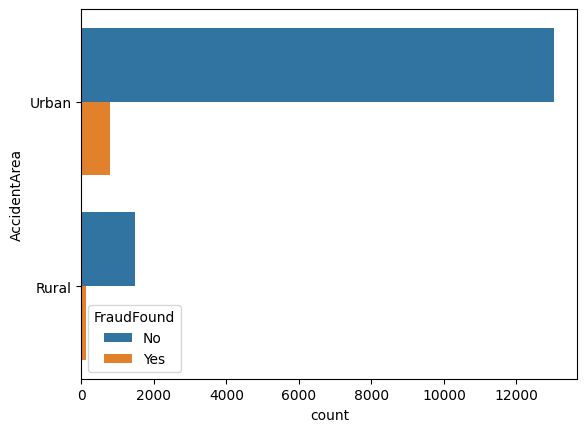

In [ ]:
sns.countplot(data=df, y='AccidentArea', hue='FraudFound')
plt.show()

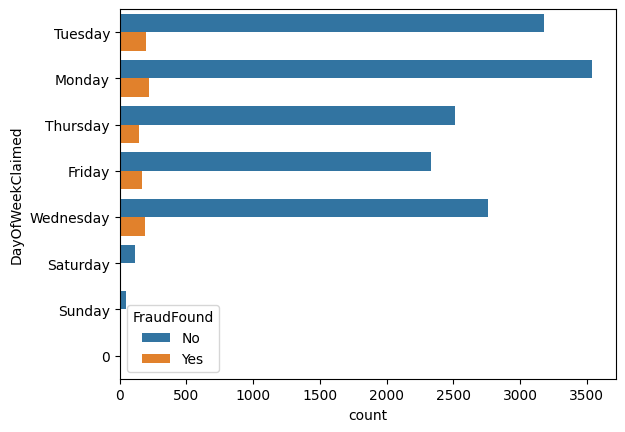

In [ ]:
sns.countplot(data=df, y='DayOfWeekClaimed', hue='FraudFound')
plt.show()

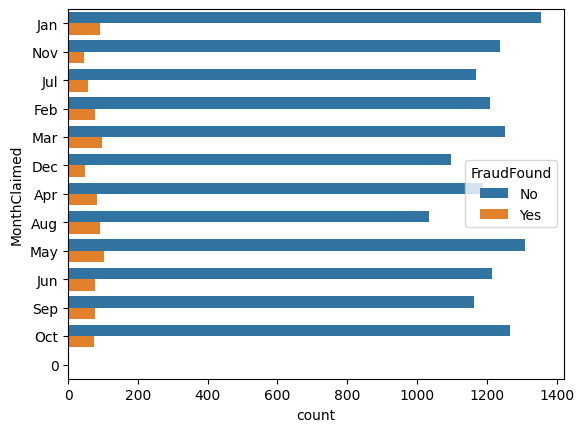

In [ ]:
sns.countplot(data=df, y='MonthClaimed', hue='FraudFound')
plt.show()

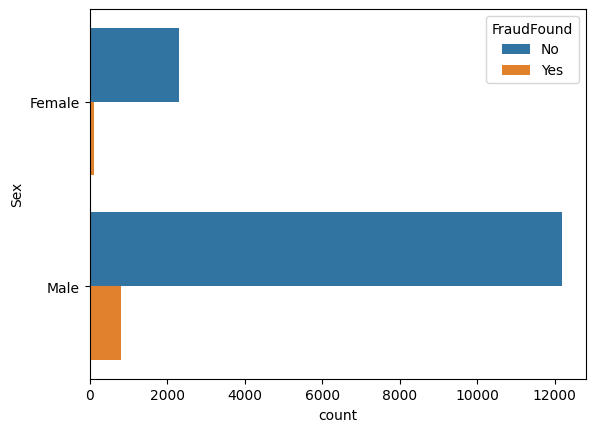

In [ ]:
sns.countplot(data=df, y='Sex', hue='FraudFound')
plt.show()

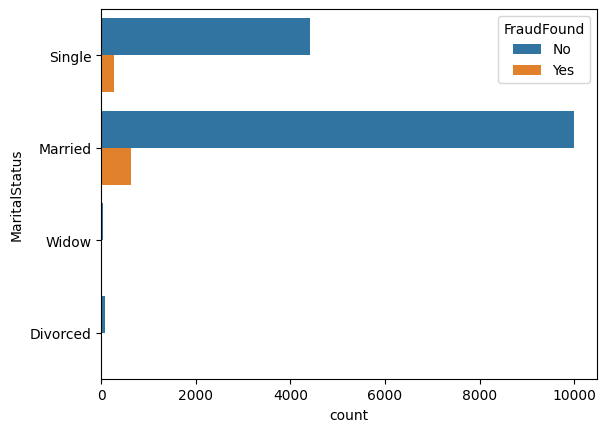

In [ ]:
sns.countplot(data=df, y='MaritalStatus', hue='FraudFound')
plt.show()

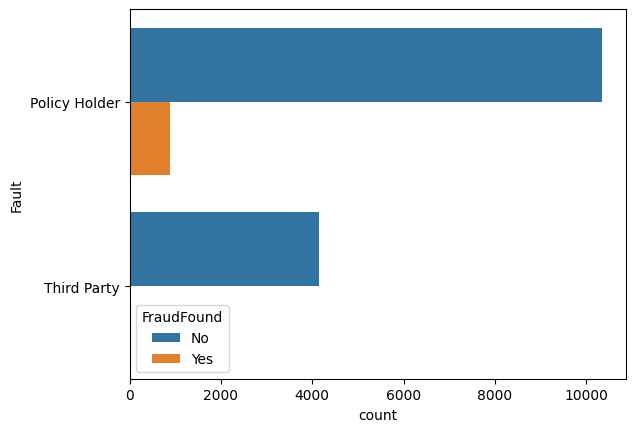

In [ ]:
sns.countplot(data=df, y='Fault', hue='FraudFound')
plt.show()

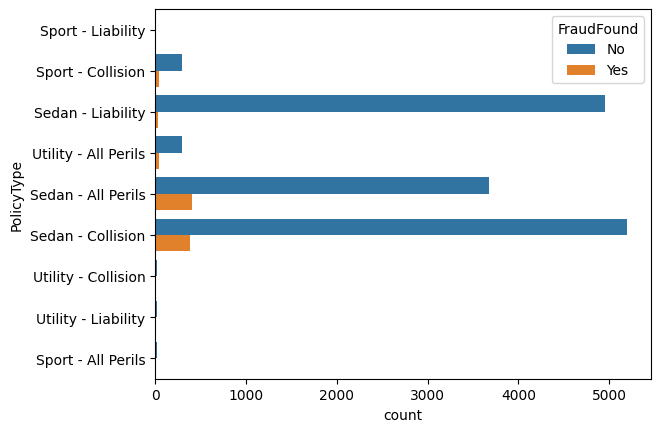

In [ ]:
sns.countplot(data=df, y='PolicyType', hue='FraudFound')
plt.show()

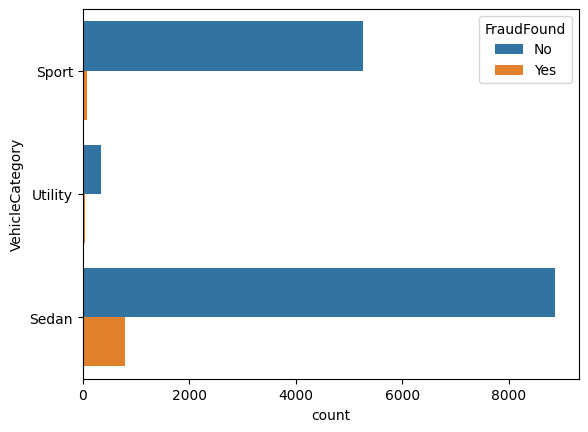

In [ ]:
sns.countplot(data=df, y='VehicleCategory', hue='FraudFound')
plt.show()

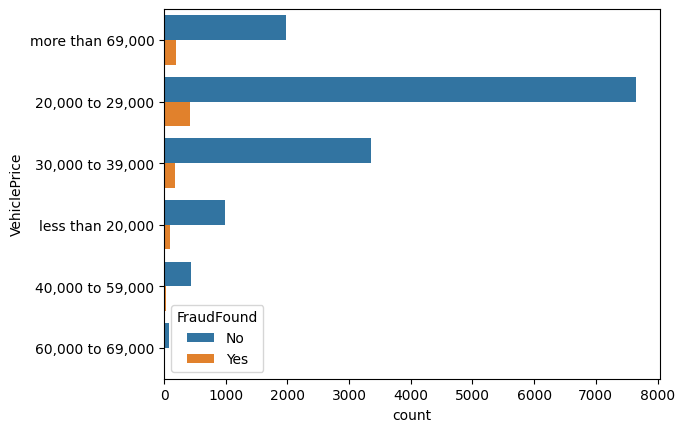

In [ ]:
sns.countplot(data=df, y='VehiclePrice', hue='FraudFound')
plt.show()

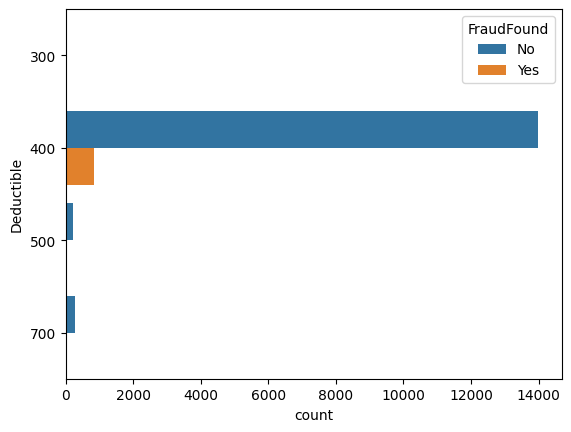

In [ ]:
sns.countplot(data=df, y='Deductible', hue='FraudFound')
plt.show()

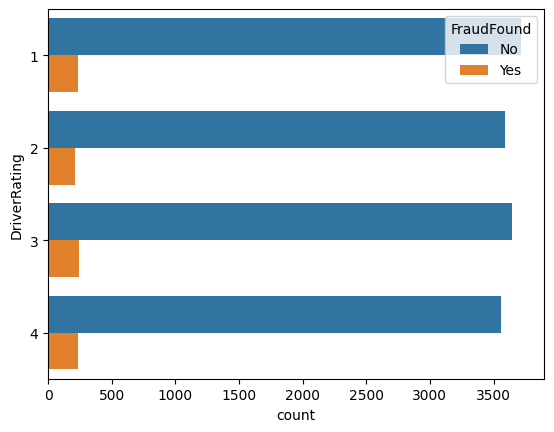

In [ ]:
sns.countplot(data=df, y='DriverRating', hue='FraudFound')
plt.show()

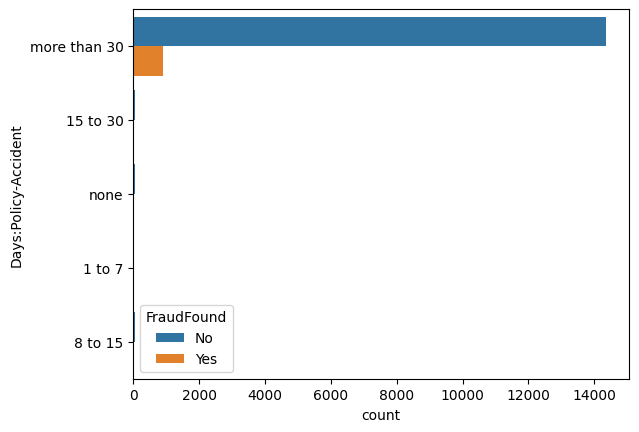

In [ ]:
sns.countplot(data=df, y='Days:Policy-Accident', hue='FraudFound')
plt.show()

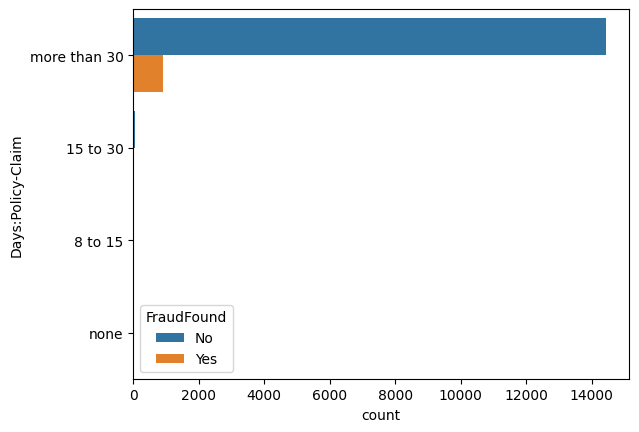

In [ ]:
sns.countplot(data=df, y='Days:Policy-Claim', hue='FraudFound')
plt.show()

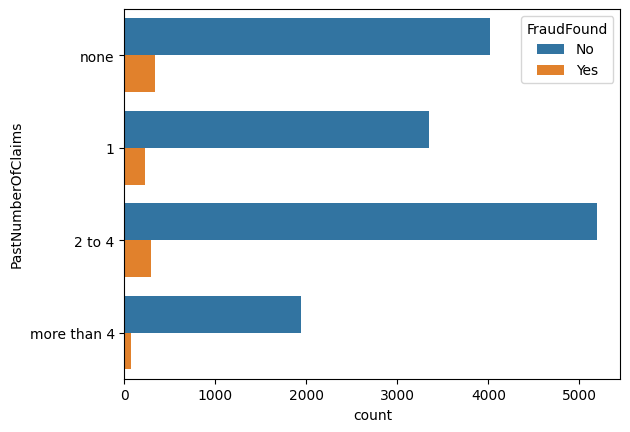

In [ ]:
sns.countplot(data=df, y='PastNumberOfClaims', hue='FraudFound')
plt.show()

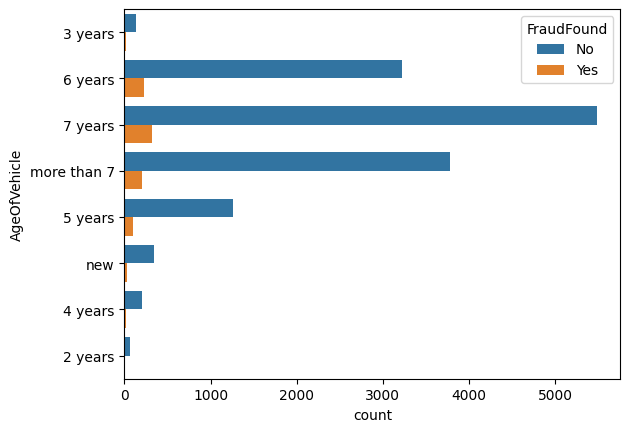

In [ ]:
sns.countplot(data=df, y='AgeOfVehicle', hue='FraudFound')
plt.show()

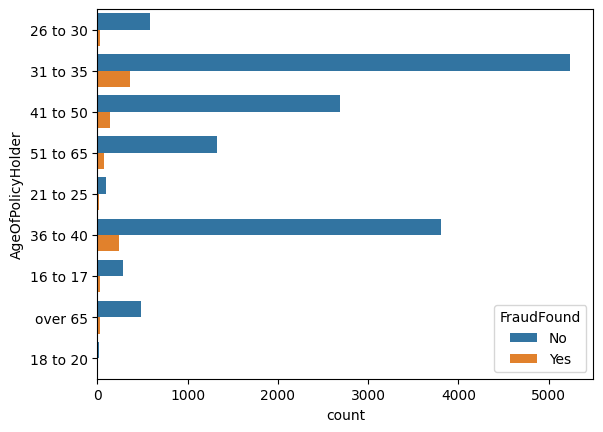

In [ ]:
sns.countplot(data=df, y='AgeOfPolicyHolder', hue='FraudFound')
plt.show()

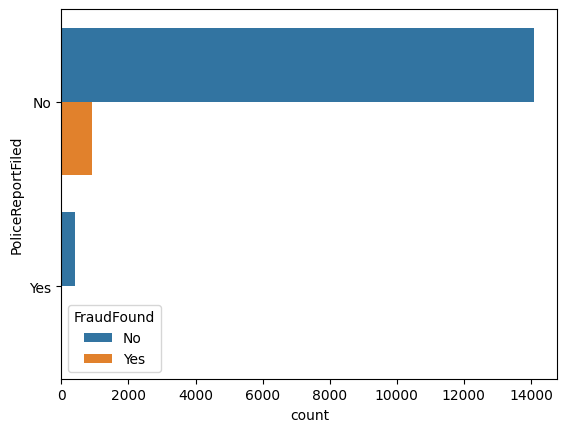

In [ ]:
sns.countplot(data=df, y='PoliceReportFiled', hue='FraudFound')
plt.show()

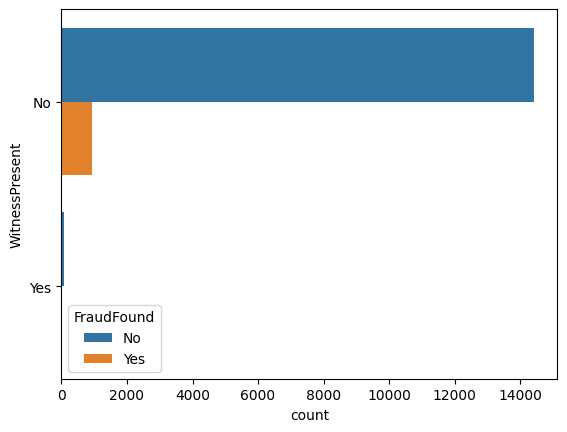

In [ ]:
sns.countplot(data=df, y='WitnessPresent', hue='FraudFound')
plt.show()

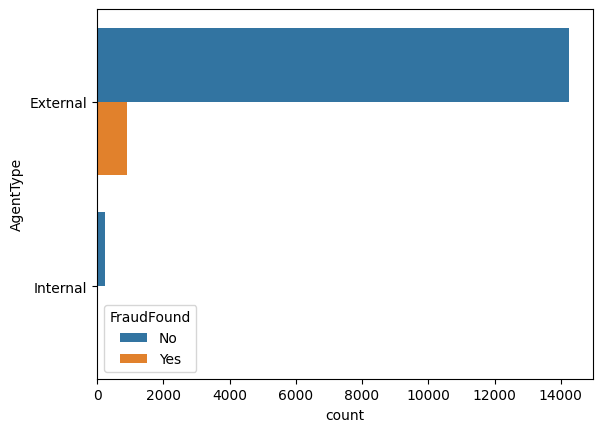

In [ ]:
sns.countplot(data=df, y='AgentType', hue='FraudFound')
plt.show()

<Axes: xlabel='count', ylabel='NumberOfSuppliments'>

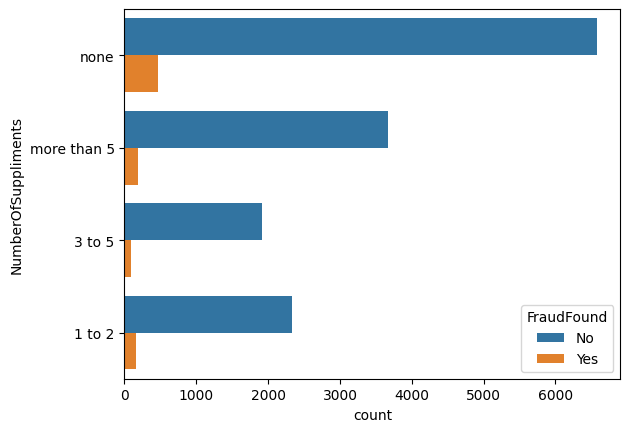

In [ ]:
sns.countplot(data=df, y='NumberOfSuppliments', hue='FraudFound')

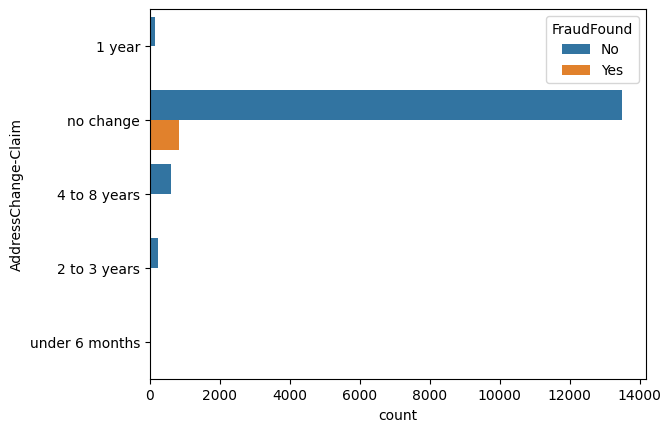

In [ ]:
sns.countplot(data=df, y='AddressChange-Claim', hue='FraudFound')
plt.show()

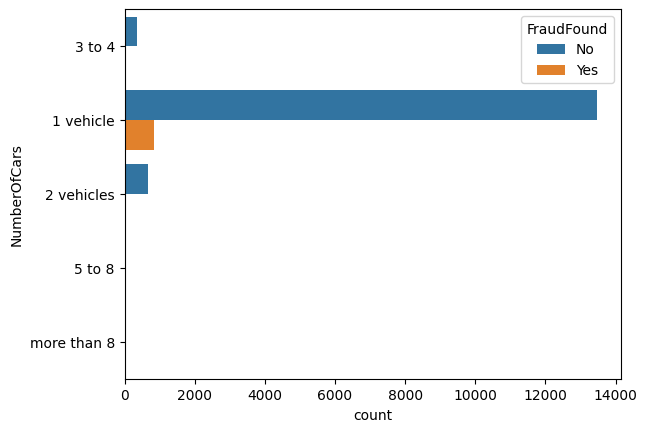

In [ ]:
sns.countplot(data=df, y='NumberOfCars', hue='FraudFound')
plt.show()

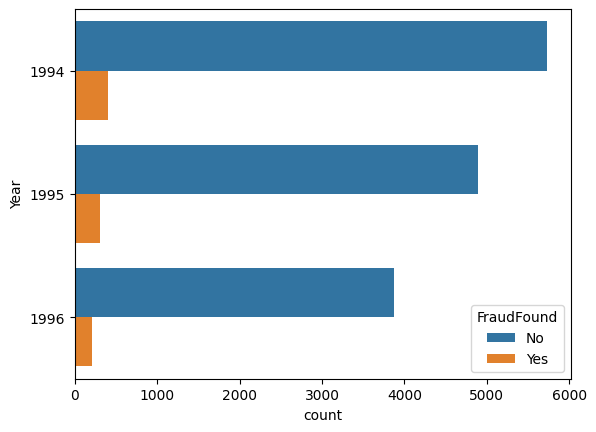

In [ ]:
sns.countplot(data=df, y='Year', hue='FraudFound')
plt.show()

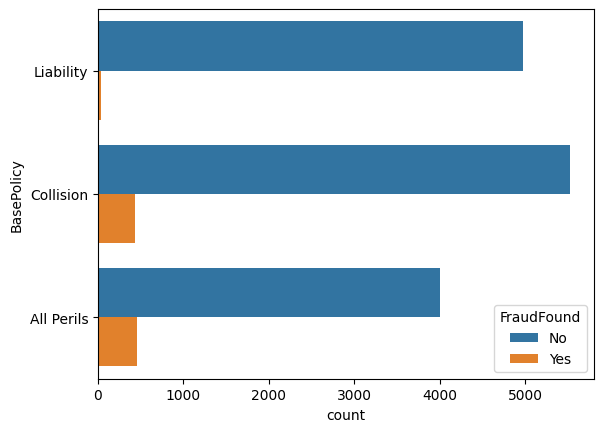

In [ ]:
sns.countplot(data=df, y='BasePolicy', hue='FraudFound')
plt.show()

# Preprocessing

### Drop redundant features


*   "PolicyNumber" , It's an ID number
*   "AgeOfPolicyHolder" , Redundant with Age
*   "BasePolicy" , Redundant with PolicyType







In [ ]:
df.columns
#print(df.columns.shape)  #33

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound'],
      dtype='object')

In [ ]:
#make list that contained name of unwated columns or redundancy columns
unwanted_features = ['PolicyNumber', 'AgeOfPolicyHolder', 'BasePolicy', 'VehicleCategory']

In [ ]:
#drop unwanted columns
df_drop = df.drop(unwanted_features, axis=1)

In [ ]:
print(df.shape)
print(df_drop.shape)

(15420, 33)
(15420, 29)


In [ ]:
cath_features = []
for name in df_drop.columns:
  if df_drop[name].dtype != "int64":
    cath_features.append(name)
cath_features

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehiclePrice',
 'Days:Policy-Accident',
 'Days:Policy-Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange-Claim',
 'NumberOfCars',
 'FraudFound']

In [ ]:
#Then remove Labels from list
#cath_features.remove('FraudFound')
#cath_features

**Change Categorical to number**

In [ ]:
# 'Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed'

In [ ]:
df_drop['Month'].unique()

array(['Dec', 'Jan', 'Oct', 'Jun', 'Feb', 'Nov', 'Apr', 'Mar', 'Aug',
       'Jul', 'May', 'Sep'], dtype=object)

In [ ]:
df_drop['DayOfWeek'].unique()

array(['Wednesday', 'Friday', 'Saturday', 'Monday', 'Tuesday', 'Sunday',
       'Thursday'], dtype=object)

In [ ]:
df_drop['Make'].unique()

array(['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac',
       'Accura', 'Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab',
       'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'],
      dtype=object)

In [ ]:
df_drop['AccidentArea'].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
df_drop['DayOfWeekClaimed'].unique()

array(['Tuesday', 'Monday', 'Thursday', 'Friday', 'Wednesday', 'Saturday',
       'Sunday', '0'], dtype=object)

In [ ]:
df_drop['MonthClaimed'].unique()

array(['Jan', 'Nov', 'Jul', 'Feb', 'Mar', 'Dec', 'Apr', 'Aug', 'May',
       'Jun', 'Sep', 'Oct', '0'], dtype=object)

In [ ]:
# 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehiclePrice',  'Days:Policy-Accident',

In [ ]:
df_drop['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df_drop['MaritalStatus'].unique()

array(['Single', 'Married', 'Widow', 'Divorced'], dtype=object)

In [ ]:
df_drop['Fault'].unique()

array(['Policy Holder', 'Third Party'], dtype=object)

In [ ]:
df_drop['PolicyType'].unique()

array(['Sport - Liability', 'Sport - Collision', 'Sedan - Liability',
       'Utility - All Perils', 'Sedan - All Perils', 'Sedan - Collision',
       'Utility - Collision', 'Utility - Liability', 'Sport - All Perils'],
      dtype=object)

In [ ]:
df_drop['VehiclePrice'].unique()

array(['more than 69,000', '20,000 to 29,000', '30,000 to 39,000',
       'less than 20,000', '40,000 to 59,000', '60,000 to 69,000'],
      dtype=object)

In [ ]:
df_drop['Days:Policy-Accident'].unique()

array(['more than 30', '15 to 30', 'none', '1 to 7', '8 to 15'],
      dtype=object)

In [ ]:
# 'Days:Policy-Claim', 'PastNumberOfClaims', 'AgeOfVehicle',  'PoliceReportFiled'

In [ ]:
df_drop['Days:Policy-Claim'].unique()

array(['more than 30', '15 to 30', '8 to 15', 'none'], dtype=object)

In [ ]:
df_drop['PastNumberOfClaims'].unique()

array(['none', '1', '2 to 4', 'more than 4'], dtype=object)

In [ ]:
df_drop['AgeOfVehicle'].unique()

array(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
       '4 years', '2 years'], dtype=object)

In [ ]:
df_drop['PoliceReportFiled'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# 'WitnessPresent',  'AgentType',  'NumberOfSuppliments',  'AddressChange-Claim', 'NumberOfCars'

In [ ]:
df_drop['WitnessPresent'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df_drop['AgentType'].unique()

array(['External', 'Internal'], dtype=object)

In [ ]:
df_drop['NumberOfSuppliments'].unique()

array(['none', 'more than 5', '3 to 5', '1 to 2'], dtype=object)

In [ ]:
df_drop['AddressChange-Claim'].unique()

array(['1 year', 'no change', '4 to 8 years', '2 to 3 years',
       'under 6 months'], dtype=object)

In [ ]:
df_drop['NumberOfCars'].unique()

array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
      dtype=object)

In [ ]:
df_drop['FraudFound'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#Creat Dictionary
# 'Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed'
# 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehiclePrice',  'Days:Policy-Accident',
# 'Days:Policy-Claim', 'PastNumberOfClaims', 'AgeOfVehicle',  'PoliceReportFiled'
# 'WitnessPresent',  'AgentType',  'NumberOfSuppliments',  'AddressChange-Claim', 'NumberOfCars'

Month = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
DayOfWeek = {'Sunday':1,'Monday':2,'Tuesday':3,'Wednesday':4,'Thursday':5,'Friday':6,'Saturday':7}
Make = {'Honda':1, 'Toyota':2, 'Ford':3, 'Mazda':4, 'Chevrolet':5, 'Pontiac':6,
       'Accura':7, 'Dodge':8, 'Mercury':9, 'Jaguar':10, 'Nisson':11, 'VW':12, 'Saab':13,
       'Saturn':14, 'Porche':15, 'BMW':16, 'Mecedes':17, 'Ferrari':18, 'Lexus':19}
AccidentArea = {'Urban' : 0, "Rural": 1}
DayOfWeekClaimed= {'Sunday':1,'Monday':2,'Tuesday':3,'Wednesday':4,'Thursday':5,'Friday':6,'Saturday':7}
MonthClaimed = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}

Sex = {'Female' : 0, "Male": 1}
MaritalStatus = {'Single':1,'Married':2,'Widow':3, 'Divorced':4}
Fault = {'Policy Holder':0, "Third Party":1}
PolicyType = {'Sport - Liability':0, 'Sport - Collision':1, 'Sedan - Liability':2,
       'Utility - All Perils':3, 'Sedan - All Perils':4, 'Sedan - Collision':5,
       'Utility - Collision':6, 'Utility - Liability':7, 'Sport - All Perils':8}
VehiclePrice = {'more than 69,000':0, '20,000 to 29,000':1, '30,000 to 39,000':2,
       'less than 20,000':3, '40,000 to 59,000':4, '60,000 to 69,000':5}
Days_Policy_Accident = {'more than 30':2, '15 to 30':1, 'none':0, '1 to 7':3, '8 to 15':4}

Days_Policy_Claim = {'more than 30':2, '15 to 30':1, '8 to 15':3, 'none':0}
PastNumberOfClaims = {'none':0, '1':1, '2 to 4':2, 'more than 4':3}
AgeOfVehicle = {'3 years':2, '6 years':5, '7 years':6, 'more than 7':7, '5 years':4, 'new':0,
       '4 years':3, '2 years':1}
PoliceReportFiled = {'No':0, "Yes":1}

WitnessPresent = {'No':0, "Yes":1}
AgentType = {'External':0, 'Internal':1}
NumberOfSuppliments = {'none':0, 'more than 5':3, '3 to 5':2, '1 to 2':1}
AddressChange_Claim = {'1 year':2, 'no change':0, '4 to 8 years':4, '2 to 3 years':3,
       'under 6 months':1}
NumberOfCars = {'3 to 4':2, '1 vehicle' :0, '2 vehicles':1, '5 to 8':3, 'more than 8':4}
FraudFound = {'No':0, "Yes":1}

In [ ]:
#replace with Dcitionary
# 'Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed'
# 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehiclePrice',  'Days:Policy-Accident',
# 'Days:Policy-Claim', 'PastNumberOfClaims', 'AgeOfVehicle',  'PoliceReportFiled'
# 'WitnessPresent',  'AgentType',  'NumberOfSuppliments',  'AddressChange-Claim', 'NumberOfCars'
df_drop['Month'].replace(Month, inplace =True)
df_drop['MonthClaimed'].replace(MonthClaimed, inplace =True)
df_drop['DayOfWeekClaimed'].replace(DayOfWeekClaimed, inplace =True)
df_drop['DayOfWeek'].replace(DayOfWeek, inplace =True)
df_drop['Make'].replace(Make, inplace =True)
df_drop['AccidentArea'].replace(AccidentArea, inplace =True)
df_drop['Sex'].replace(Sex, inplace =True)
df_drop['MaritalStatus'].replace(MaritalStatus, inplace =True)
df_drop['Fault'].replace(Fault, inplace =True)
df_drop['PolicyType'].replace(PolicyType, inplace =True)
df_drop['VehiclePrice'].replace(VehiclePrice, inplace =True)
df_drop['Days:Policy-Accident'].replace(Days_Policy_Accident, inplace =True)
df_drop['Days:Policy-Claim'].replace(Days_Policy_Claim, inplace =True)
df_drop['PastNumberOfClaims'].replace(PastNumberOfClaims, inplace =True)
df_drop['AgeOfVehicle'].replace(AgeOfVehicle, inplace =True)
df_drop['PoliceReportFiled'].replace(PoliceReportFiled, inplace =True)
df_drop['WitnessPresent'].replace(WitnessPresent, inplace =True)
df_drop['AgentType'].replace(AgentType, inplace =True)
df_drop['NumberOfSuppliments'].replace(NumberOfSuppliments, inplace =True)
df_drop['AddressChange-Claim'].replace(AddressChange_Claim, inplace =True)
df_drop['NumberOfCars'].replace(NumberOfCars, inplace =True)
df_drop['FraudFound'].replace(FraudFound, inplace =True)

In [ ]:
#df_drop.info()
#df_drop.head()
#df_drop['DayOfWeekClaimed']
#df_drop['MonthClaimed']

In [ ]:
df_drop['DayOfWeekClaimed'].astype(int)
df_drop['MonthClaimed'].astype(int)

0         1
1         1
2        11
3         7
4         2
         ..
15415    11
15416    12
15417    12
15418    12
15419    12
Name: MonthClaimed, Length: 15420, dtype: int64

In [ ]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  int64 
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  int64 
 3   Make                  15420 non-null  int64 
 4   AccidentArea          15420 non-null  int64 
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  int64 
 9   MaritalStatus         15420 non-null  int64 
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  int64 
 12  PolicyType            15420 non-null  int64 
 13  VehiclePrice          15420 non-null  int64 
 14  RepNumber             15420 non-null  int64 
 15  Deductible            15420 non-null

In [ ]:
Y = df_drop[['FraudFound']]
X = df_drop.drop('FraudFound', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=99,stratify=Y)